In this We are creating a simple LLM workflow, where a user gives a question and we geenrate an response from LLM.



In [1]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [18]:
%%capture output
pip install langgraph langchain langchain_openai

In [11]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict


In [6]:
model = ChatOpenAI()


In [7]:
# Create a state
class LLMState(TypedDict):
  question: str
  answer: str



In [9]:
def llm_qa(state: LLMState) -> LLMState:
  # Extract the question from state
  question = state['question']

  # Create Prompt
  prompt = f'Answer the following question {question}'

  # Ask the question to LLM
  answer = model.invoke(prompt).content

  # Update the answer in the state
  state['answer'] = answer

  return state

In [15]:
# Create Our Graph
graph = StateGraph(LLMState)

# Add Nodes
graph.add_node('llm_qa',llm_qa)

# Add Edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# Compile the graph
workflow = graph.compile()



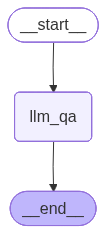

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [16]:
# Execute

initial_state = {'question':'How far is Delhi from Mumbai'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'How far is Delhi from Mumbai', 'answer': 'The distance between Delhi and Mumbai is approximately 1,419 kilometers (882 miles) when traveling by road.'}
